In [1]:
%matplotlib inline
import xmitgcm
import xgcm
import xarray as xr
import matplotlib.pyplot as plt
from xlayers.core import layers_apply
import numpy as np
from MITgcmutils import jmd95
import time as time
import matplotlib.colors as colors
from pathlib import Path
import pandas as pd
from scipy.interpolate import interp1d

In [132]:
dsctr = xr.open_dataset("../data/single_basin_ctrl.nc", engine = "netcdf4")
dsctr["Volume"] = dsctr.rA * dsctr.drF * dsctr.hFacC

dsGM2x = xr.open_dataset("../data/single_basin_GM2X.nc", engine = "netcdf4")
dsGM2x["Volume"] = dsGM2x.rA * dsGM2x.drF * dsGM2x.hFacC

dsRedi2x = xr.open_dataset("../data/single_basin_Redi2X.nc", engine = "netcdf4")
dsRedi2x["Volume"] = dsRedi2x.rA * dsRedi2x.drF * dsRedi2x.hFacC

dskappa2x = xr.open_dataset("../data/single_basin_Kappa2X.nc", engine = "netcdf4")
dskappa2x["Volume"] = dskappa2x.rA * dskappa2x.drF * dskappa2x.hFacC

In [133]:
def volume_average(ds, quantity):
    numerator = (ds[quantity] * ds["Volume"]).sum(["Z", "YC", "XC"])
    denominator = ds["Volume"].sum(["Z", "YC", "XC"])
    return numerator / denominator

In [134]:
ds_experiments = [dsctr, dsGM2x, dsRedi2x, dskappa2x]
for ds in ds_experiments:
    ds["mean_sst"] = volume_average(ds[["Ttave", "Volume"]].isel(Z = [0]), "Ttave");
    ds["mean_ocean_temp"] = volume_average(ds[["Ttave", "Volume"]], "Ttave");

2X_GM
2X_Redi
2X_Kappa


(-1.0, 1.0)

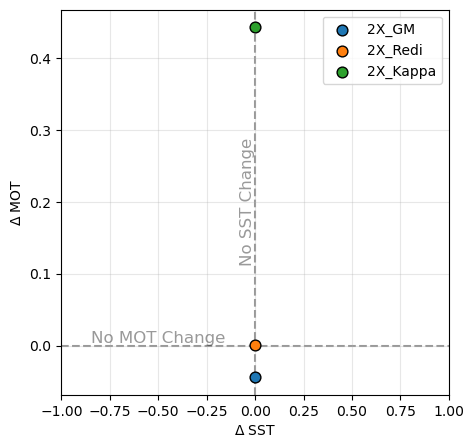

In [198]:
ds_experiments = [dsGM2x, dsRedi2x, dskappa2x]
experiment_labels = ["2X_GM", "2X_Redi", "2X_Kappa"]
reference_sst = dsctr["mean_sst"].mean("time").values
reference_ocean_temp = dsctr["mean_ocean_temp"].mean("time").values

fig, ax = plt.subplots(figsize = (5, 5))
ax.grid(alpha = 0.3)

for (i, ds) in enumerate(ds_experiments):
    print(experiment_labels[i])
    exp_sst = ds["mean_sst"].mean("time").values
    exp_ocean_temp = ds["mean_ocean_temp"].mean("time").values

    ax.scatter(exp_sst - reference_sst,
               exp_ocean_temp - reference_ocean_temp,
                label = experiment_labels[i], edgecolors = "k", 
                s = 60, zorder = 10)

ax.axvline(x=0, color='black', linestyle='--', alpha = 0.4, zorder = 0)
ax.text(0, .2, 'No SST Change', fontsize = 12, rotation=90, 
        verticalalignment='center', horizontalalignment='right', alpha = 0.4)

# Add a horizontal line and label to the second subplot
ax.axhline(y=0, color='black', linestyle='--', alpha = 0.4, zorder = 0)
ax.text(-0.5, 0, 'No MOT Change', fontsize = 12, rotation=0, 
        verticalalignment='bottom', horizontalalignment='center', alpha = 0.4)

ax.legend(loc = "upper right")
ax.set_ylabel(r"$\Delta$ MOT")
ax.set_xlabel(r"$\Delta$ SST")
ax.set_xlim(-1, 1)

In [201]:
def lateral_average(ds, quantity):
    numerator = (ds[quantity] * ds["Volume"]).sum(["YC", "XC"])
    denominator = ds["Volume"].sum(["YC", "XC"])
    return numerator / denominator

In [220]:
dsctr["average_age_profile"] = lateral_average(dsctr, "PTRtave01").mean("time") /31104000
dsGM2x["average_age_profile"] = lateral_average(dsGM2x, "PTRtave01").mean("time") /31104000
dsRedi2x["average_age_profile"] = lateral_average(dsRedi2x, "PTRtave01").mean("time") /31104000
dskappa2x["average_age_profile"] = lateral_average(dskappa2x, "PTRtave01").mean("time") /31104000

2X_GM
2X_Redi
2X_Kappa
CTRL


Text(0, 0.5, 'Depth [meters]')

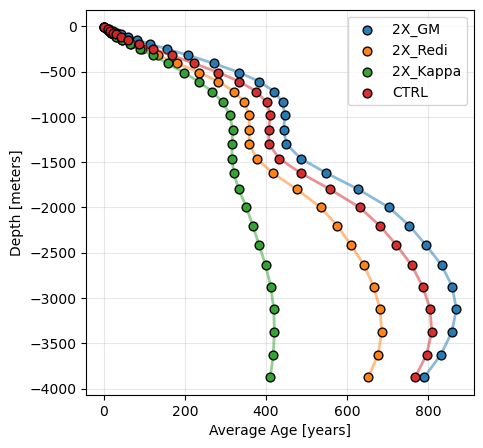

In [232]:
ds_experiments = [dsGM2x, dsRedi2x, dskappa2x, dsctr]
experiment_labels = ["2X_GM", "2X_Redi", "2X_Kappa", "CTRL"]
reference_profile = dsctr["average_age_profile"].values

fig, ax = plt.subplots(figsize = (5, 5))
ax.grid(alpha = 0.3)

for (i, ds) in enumerate(ds_experiments):
    print(experiment_labels[i])
    exp_profile = ds["average_age_profile"].values

    ax.plot(exp_profile,
               dsGM2x.Z.values, zorder = 10, linewidth = 2, alpha = 0.5)
    ax.scatter(exp_profile,
               dsGM2x.Z.values,
                label = experiment_labels[i], edgecolors = "k", 
                s = 40, zorder = 10, alpha = 0.95)
# ax.axvline(x=0, color='black', linestyle='--', alpha = 0.4, zorder = 0)
# ax.text(0, .2, 'No SST Change', fontsize = 12, rotation=90, 
#         verticalalignment='center', horizontalalignment='right', alpha = 0.4)

# # Add a horizontal line and label to the second subplot
# ax.axhline(y=0, color='black', linestyle='--', alpha = 0.4, zorder = 0)
# ax.text(-0.5, 0, 'No MOT Change', fontsize = 12, rotation=0, 
#         verticalalignment='bottom', horizontalalignment='center', alpha = 0.4)

ax.legend(loc = "upper right")
ax.set_xlabel(r"Average Age [years]")
ax.set_ylabel(r"Depth [meters]")
# ax.set_xlim(-1, 1)